# UCI Heart Disease Data

One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

**Column Descriptions:**
+ **age**: age of the patient in years
+ **origin**: place of study
+ **sex**: Male/Female
+ **cp**: chest pain type: typical angina, atypical angina, non-anginal, asymptomatic
+ **trestbps**: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
+ **chol**: serum cholesterol in mg/dl
+ **fbs**: if fasting blood sugar > 120 mg/dl - TRUE
+ **restecg**: resting electrocardiography results: normal, stt abnormality, lv hypertrophy
+ **thalach**: maximum heart rate achieved
+ **exang**: exercise-induced angina (True/ False)
+ **oldpeak**: ST depression induced by exercise relative to rest
+ **slope**: the slope of the peak exercise ST segment
+ **ca**: number of major vessels (0-3) colored by fluoroscopy
+ **thal**: normal; fixed defect; reversible defect; Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen. Thalassemia can cause anemia, leaving you fatigued.
+ **num**: the predicted attribute
------

## Main goal
+ whether that particular person has heart disease or not - building classification model

------

## Table of contents

1. Packages and loading data
2. Data types and missing values
3. Making a list of qualitative and quantitative variables
4. Data overview for df_1
    1. Qualitative variables
    2. Quantitative variables
5. Data overview for df_2
    1. Qualitative variables
    2. Quantitative variables

------


# Packages and loading data

------

In [1]:
# Packages

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import kurtosis, skew, shapiro

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Loading data

df = pd.read_csv("C:/Users/chole/Desktop/UCI_Heart_Disease/heart_disease_uci.csv").drop(columns="id")
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data types and missing values

------

In [4]:
# Checking the data types

df.dtypes

age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

We have a lot of object columns in our dataset so let see haw many of each levels they contain.

In [5]:
for i in ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal"]:
    print()
    print(df[[i]].value_counts(dropna=True))


sex   
Male      726
Female    194
dtype: int64

dataset      
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
dtype: int64

cp             
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
dtype: int64

fbs  
False    692
True     138
dtype: int64

restecg         
normal              551
lv hypertrophy      188
st-t abnormality    179
dtype: int64

exang
False    528
True     337
dtype: int64

slope      
flat           345
upsloping      203
downsloping     63
dtype: int64

thal             
normal               196
reversable defect    192
fixed defect          46
dtype: int64


Since each of the levels appears to be sufficiently represented we will now look at the missing data.

In [6]:
# Checking the percentage of missing values

np.round(df.isnull().sum()/len(df)*100,2)

age          0.00
sex          0.00
dataset      0.00
cp           0.00
trestbps     6.41
chol         3.26
fbs          9.78
restecg      0.22
thalch       5.98
exang        5.98
oldpeak      6.74
slope       33.59
ca          66.41
thal        52.83
num          0.00
dtype: float64

There are many missing data in our dataset.
To view the missing values we will use the *missingno* package.

<AxesSubplot:>

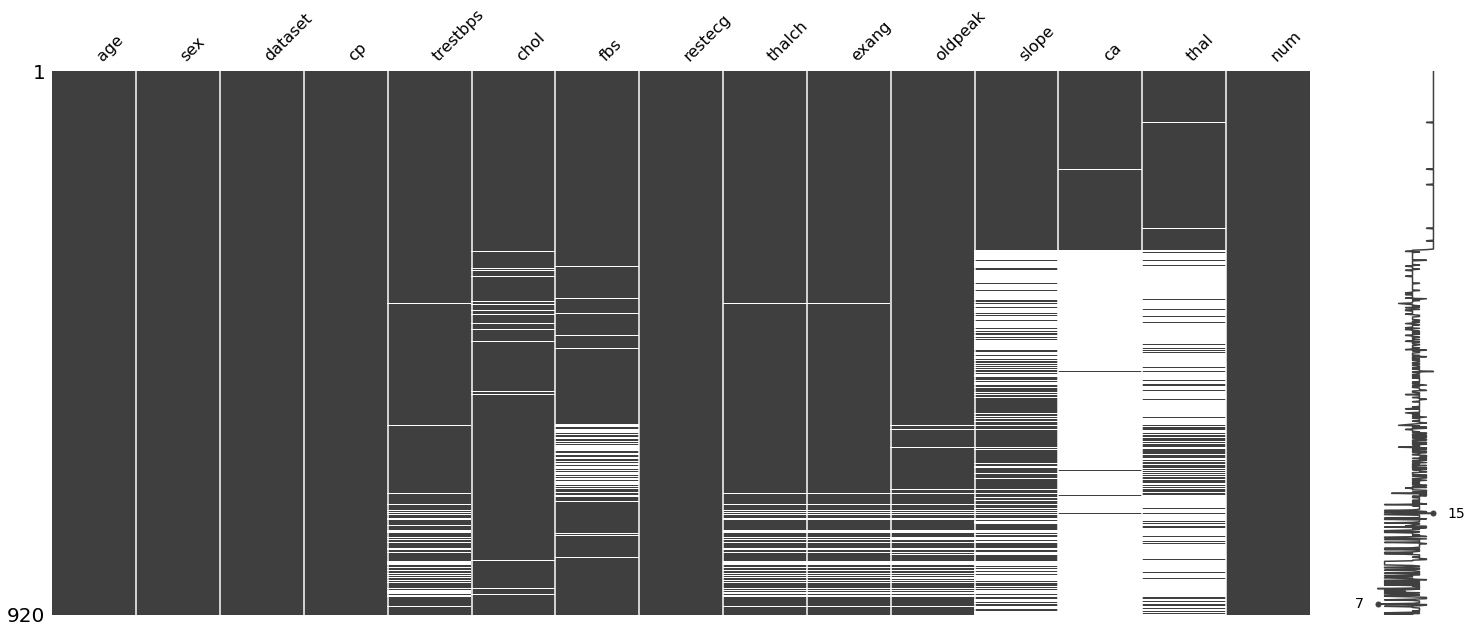

In [7]:
msno.matrix(df)

<AxesSubplot:>

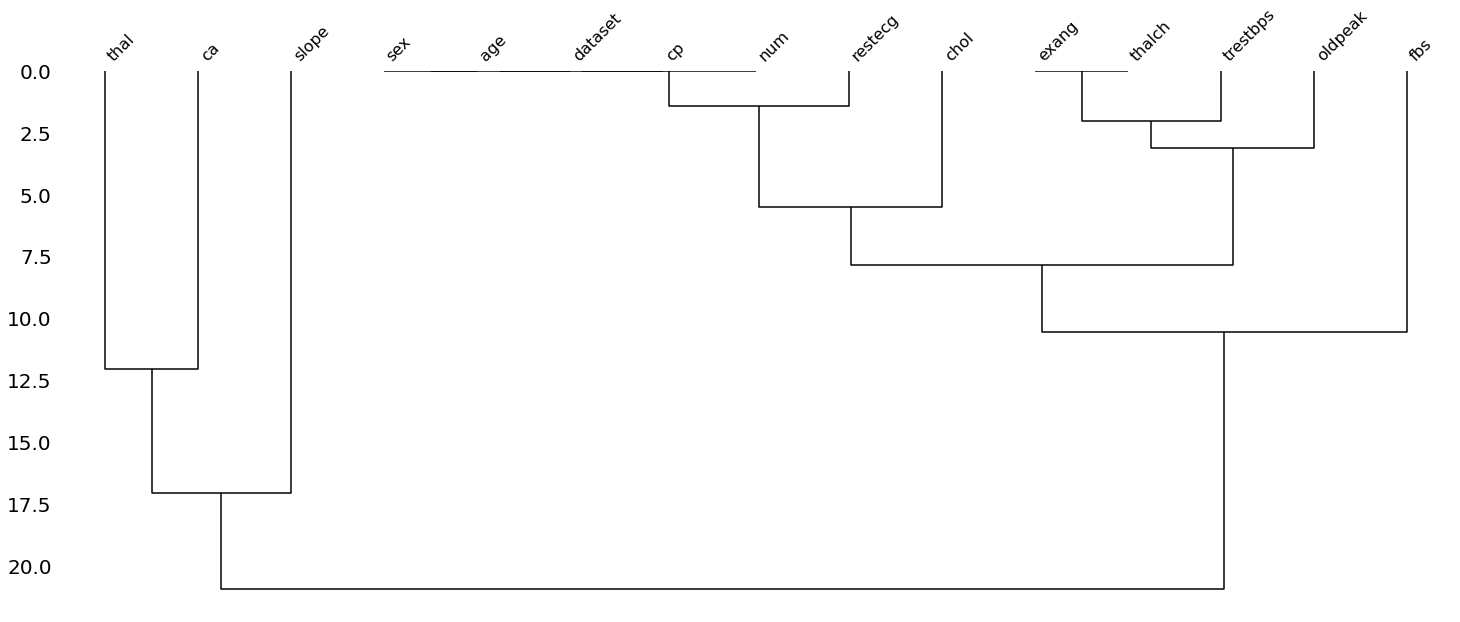

In [8]:
msno.dendrogram(df)

We can see that the *ca* and *thal* variables are largely missing so it would be safest to remove them entirely.
From the dendrogram, we can read that the missing data in the variable *exang* and *thalch* are related to each other in some way. Then the *oldpeak* variable joins this group, which may suggest that imputation using e.g. a kNN or Iterative Imputer would be a good solution.

In [9]:
# Drop both columns

df = df.drop(columns=["ca", "thal"])

In [10]:
# Imputation numerical values

lista = ["age", "trestbps", "chol", "thalch", "oldpeak"]
impute_knn = KNNImputer(n_neighbors=3)
df.loc[:, lista] = impute_knn.fit_transform(df.loc[:,lista])

In [11]:
# Re-checking missing data

np.round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

slope       33.59
fbs          9.78
exang        5.98
restecg      0.22
age          0.00
sex          0.00
dataset      0.00
cp           0.00
trestbps     0.00
chol         0.00
thalch       0.00
oldpeak      0.00
num          0.00
dtype: float64

Imputing qualitative variables is highly risky so we will not do it.

We have over 33% missing data in the *slope* variable which suggests that dropping this column would be the correct solution to the problem. However, almost 70% of its content is available so this would be an unwise move.

Three other variables have missing data of less than 10%, so this could easily be gotten rid of by deleting entire rows.

This is not a simple matter.

<AxesSubplot:>

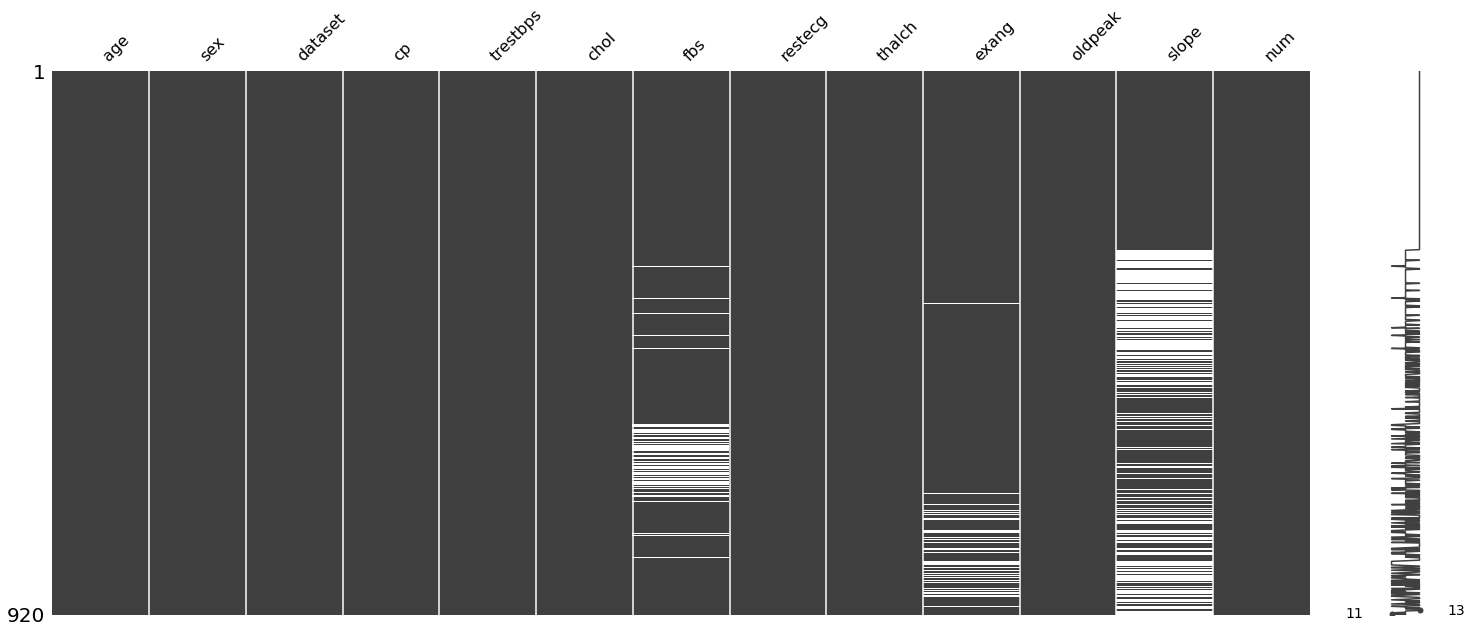

In [12]:
msno.matrix(df)

The above visualization suggests that the missing data between these four variables are quite diverse, so that row deletions can end up subtracting almost half of the entire dataset.

In [13]:
print("df length: ", len(df))
print("df without_NA: ", len(df.dropna()))
print("We wll delete: ", np.round((100-len(df.dropna())/len(df)*100),2),"% of dataset.")

df length:  920
df without_NA:  541
We wll delete:  41.2 % of dataset.


As you can see removing all rows from NAs will get rid of about 40% of the dataset.
Let's see how much we would lose if we used a different approach.

In [14]:
df_na = df.drop(columns="slope")

print("df length: ", len(df_na))
print("df without_NA: ", len(df_na.dropna()))
print("We wll delete: ", np.round((100-len(df_na.dropna())/len(df_na)*100),2),"% of dataset.")

df length:  920
df without_NA:  774
We wll delete:  15.87 % of dataset.


Dropping the *slope* column and deleting rows containing NAs in the other variables results in the loss of about 16% of the dataset.

We will keep both versions of the dataset and later examine which model is more accurate.


In [15]:
# First df with all NAs removed
df_1 = df.dropna()

# Second df with droped slope then NAs removed
df_2 = df.drop(columns="slope").dropna()

print("Shape df_1: ", df_1.shape, "Shape df_2: ", df_2.shape)

Shape df_1:  (541, 13) Shape df_2:  (774, 12)


# Making a list of qualitative and quantitative variables

------

In [53]:
# List of quantitative variables
nu = ["age", "trestbps", "chol", "thalch", "oldpeak"]
# List of qualitative variables
ca = ["sex", "cp", "dataset", "fbs", "restecg", "exang", "slope"]
ca2 = ["sex", "cp", "dataset", "fbs", "restecg", "exang"]

# Data overview for df_1

------

## Qualitative variables


In [57]:
# Fractions for categorical variables

for i in ca:
    print()
    print(df_1[[i]].value_counts(normalize=True))


sex   
Male      0.763941
Female    0.236059
dtype: float64

cp             
asymptomatic       0.598513
non-anginal        0.213755
atypical angina    0.131970
typical angina     0.055762
dtype: float64

dataset      
Cleveland        0.561338
Hungary          0.184015
VA Long Beach    0.169145
Switzerland      0.085502
dtype: float64

fbs  
False    0.842007
True     0.157993
dtype: float64

restecg         
normal              0.561338
lv hypertrophy      0.299257
st-t abnormality    0.139405
dtype: float64

exang
False    0.5
True     0.5
dtype: float64

slope      
flat           0.581784
upsloping      0.325279
downsloping    0.092937
dtype: float64


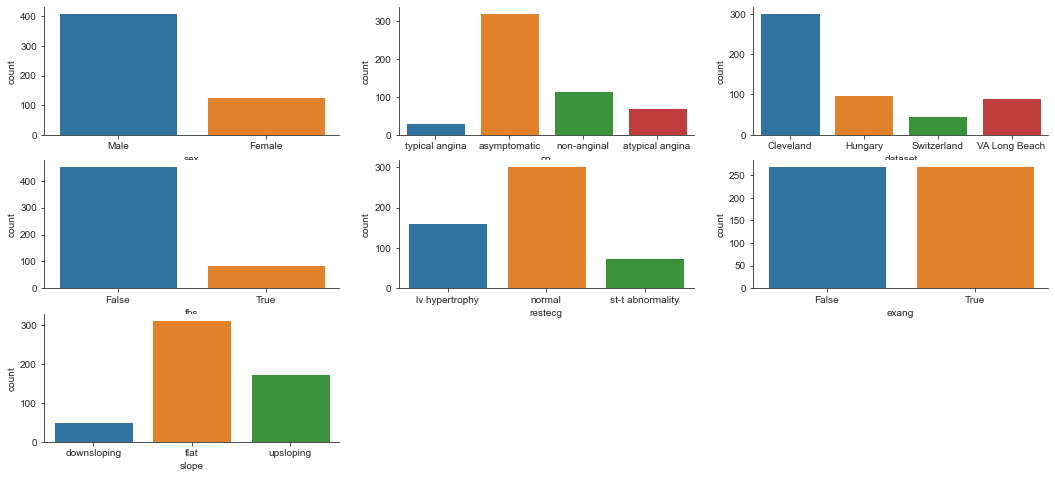

In [55]:
count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.subplots(figsize=(18, 8))

# Loop to make graphs
for col in df_1.loc[:,ca]:
    plt.subplot(3,3, count)
    sns.countplot(df_1[col])
    count+=1

## Quantitative variables

In [56]:
# Descriptive statistics

df_1.loc[:, nu].describe()

,age,trestbps,chol,thalch,oldpeak
count,538.000000,538.000000,538.000000,538.000000,538.000000
mean,54.815985,133.643742,214.897150,138.206320,1.226580
std,8.887334,18.086307,96.330625,25.863346,1.103937
min,29.000000,92.000000,0.000000,60.000000,-1.000000
25%,49.000000,120.000000,195.250000,120.000000,0.100000
50%,56.000000,130.000000,232.000000,140.000000,1.000000
75%,61.000000,142.000000,271.000000,158.000000,2.000000
max,77.000000,200.000000,458.000000,202.000000,6.200000


In [21]:
# Coefficient of variation

"""
The coefficient of variation provides a relative measure of variation 
thus allowing comparison of variables with different units of measurement.

It characterizes the ratio of the intensity of the secondary causes to the primary causes.

Source: Biostatystyka, red. A.Stanisz (book)
"""
def cv(x): return np.std(x) / np.mean(x) * 100
df_1.loc[:, nu].apply(cv)

age         16.175012
trestbps    14.194131
chol        45.858059
thalch      18.662057
oldpeak     89.629321
dtype: float64

In [22]:
# Kurtosis

"""
Kurtosis is a measure of outliers. 
The higher its value, the more likely there are outliers in the database. 
The lower the value, the more the results are clustered around the mean.
Safe threshold: K=|3|. 

Source: Biostatystyka, red. A.Stanisz (book)
"""
df_1.loc[:, nu].apply(kurtosis, bias=False)

age        -0.307973
trestbps    4.753509
chol        1.196169
thalch     -0.496908
oldpeak     0.800328
dtype: float64

In [23]:
# Skewness

"""
Skewness, in statistics, is the degree of asymmetry observed in a probability distribution.
Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees. 
A normal distribution (bell curve) exhibits zero skewness.

The mean of positively skewed data will be greater than the median. 
The mean of negatively skewed data will be less than the median.

Source: https://www.investopedia.com/terms/s/skewness.asp
"""
df_1.loc[:, nu].apply(skew, bias=False)

age        -0.201432
trestbps   -0.019457
chol       -0.847286
thalch     -0.200808
oldpeak     0.866364
dtype: float64

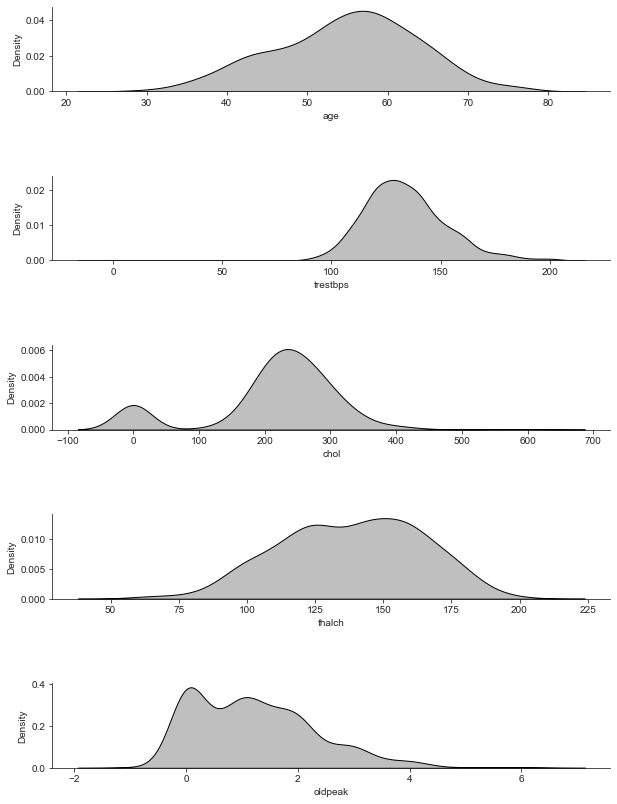

In [24]:
# Density/distribution graphs

count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(rc=custom_params)
# Setting the chart size
plt.subplots(figsize=(10, 14))

# Loop to make graphs
for col in df_1.loc[:, nu]:
    plt.subplot(len(nu),1, count)
    plt.subplots_adjust(hspace = 1)
    sns.kdeplot(df_1[col],
                shade=True,
                color='k')
    count+=1

In [25]:
# Test of normality

"""
The Shapiro-Wilk test is a test of normality. 
It is used to determine whether or not a sample comes from a normal distribution.

H0: the distribution of the data --are not-- significantly different from normal distribution.
H1: the distribution of the data --are------ significantly different from normal distribution.

Source: https://www.statology.org/shapiro-wilk-test-python/
"""
df_1.loc[:, nu].apply(shapiro)

,age,trestbps,chol,thalch,oldpeak
0,0.991564,9.437661e-01,8.619919e-01,0.989677,9.161044e-01
1,0.003598,1.881521e-13,2.058228e-21,0.000750,9.448003e-17


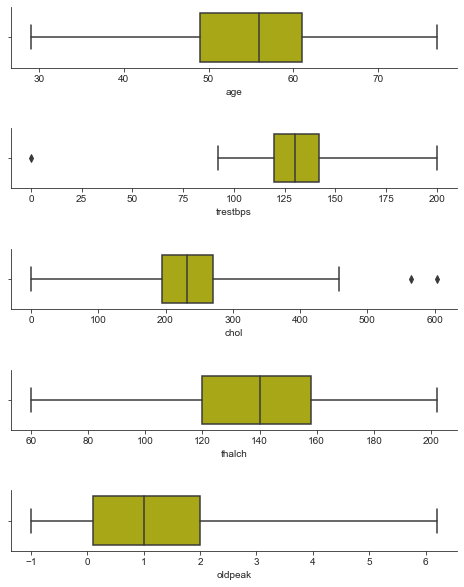

In [26]:
# Outliers

"""
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 
In a sense, this definition leaves it up to the analyst to decide what will be considered abnormal. 
Before abnormal observations can be singled out, it is necessary to characterize normal observations.

Source: https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
"""
count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.subplots(figsize=(8, 10))

# Loop to make graphs
for col in df_1.loc[:, nu]:
    plt.subplot(len(nu),1, count)
    plt.subplots_adjust(hspace = 1)
    sns.boxplot(df_1[col],
                orient="h",
                color='y',
                whis=3) # I chose "lower outer fence" to identify extreme outlier observations.
    count+=1

In [27]:
Q1 = df_1.loc[:, nu].quantile(0.25)
Q3 = df_1.loc[:, nu].quantile(0.75)
IQR = Q3 - Q1

((df_1.loc[:, nu] < (Q1 - 3 * IQR)) | (df_1.loc[:, nu] > (Q3 + 3 * IQR))).sum()

age         0
trestbps    1
chol        2
thalch      0
oldpeak     0
dtype: int64

In [28]:
df_new = df_1.loc[:, nu][~((df_1.loc[:, nu] < (Q1 - 3 * IQR)) | (df_1.loc[:, nu] > (Q3 + 3 * IQR))).any(axis=1)]

In [29]:
# Dataset without extreme outliers

df_1 = df_1[df_1.index.isin(df_new.index)]

Text(0.5, 1.0, 'Correlogram')

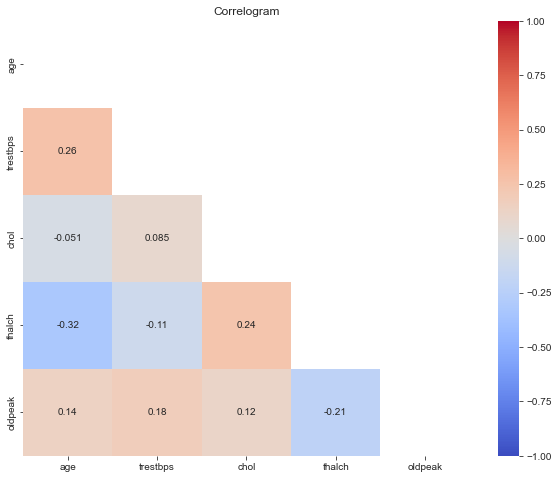

In [30]:
# Pearson’s correlation

"""
Correlation between sets of data is a measure of how well they are related. 
The most common measure of correlation in stats is the Pearson Correlation. 
It shows the linear relationship between two sets of data. 
It is not able to tell the difference between dependent variables and independent variables.

Source: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/
"""
plt.rcParams['figure.figsize'] = [10, 8]  # for size

sns.heatmap(df_1.loc[:,nu].corr(),
            annot=True,
            cmap='coolwarm',
            vmax=1, vmin=-1, # cause corr can be in range from 1 to -1
            mask=np.triu(df_1.loc[:,nu].corr())).set_title("Correlogram")

The dataset does not have a strong correlation between the quantitative variables.

In [31]:
# saving the database

# df_1.to_csv("df_1.csv")

# Data overview for df_2

------

## Qualitative variables


In [58]:
# Fractions for categorical variables

for i in ca2:
    print()
    print(df_2[[i]].value_counts(normalize=True))


sex   
Male      0.766623
Female    0.233377
dtype: float64

cp             
asymptomatic       0.522816
non-anginal        0.217731
atypical angina    0.209909
typical angina     0.049544
dtype: float64

dataset      
Cleveland        0.393742
Hungary          0.363755
VA Long Beach    0.181226
Switzerland      0.061278
dtype: float64

fbs  
False    0.848761
True     0.151239
dtype: float64

restecg         
normal              0.604954
lv hypertrophy      0.228162
st-t abnormality    0.166884
dtype: float64

exang
False    0.603651
True     0.396349
dtype: float64


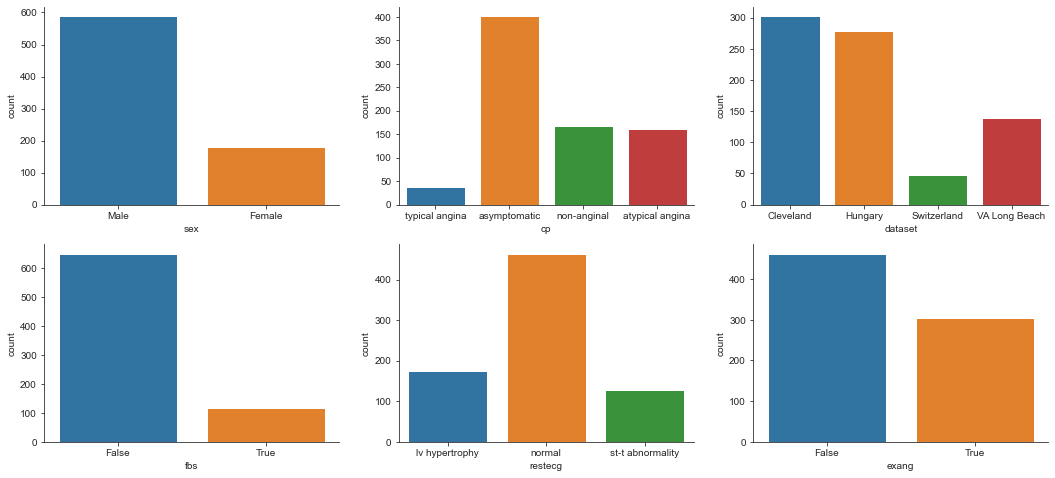

In [59]:
count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.subplots(figsize=(18, 8))

# Loop to make graphs
for col in df_2.loc[:,ca2]:
    plt.subplot(2,3, count)
    sns.countplot(df_2[col])
    count+=1

## Quantitative variables

In [34]:
# Descriptive statistics

df_2.loc[:, nu].describe()

,age,trestbps,chol,thalch,oldpeak
count,774.000000,774.000000,774.000000,774.000000,774.000000
mean,53.071059,132.798019,218.835487,138.677003,0.886391
std,9.430970,18.578632,92.890545,25.808812,1.082138
min,28.000000,0.000000,0.000000,60.000000,-1.000000
25%,46.000000,120.000000,196.000000,120.000000,0.000000
50%,54.000000,130.000000,230.000000,140.000000,0.500000
75%,60.000000,140.000000,269.000000,159.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [46]:
# Coefficient of variation

"""
The coefficient of variation provides a relative measure of variation
thus allowing comparison of variables with different units of measurement.

It characterizes the ratio of the intensity of the secondary causes to the primary causes.

Source: Biostatystyka, red. A.Stanisz (book)
"""
df_2.loc[:, nu].apply(cv)

age          17.733171
trestbps     13.516101
chol         41.046387
thalch       18.664820
oldpeak     121.137712
dtype: float64

In [36]:
# Kurtosis

"""
Kurtosis is a measure of outliers.
The higher its value, the more likely there are outliers in the database.
The lower the value, the more the results are clustered around the mean.
Safe threshold: K=|3|.

Source: Biostatystyka, red. A.Stanisz (book)
"""
df_2.loc[:, nu].apply(kurtosis, bias=False)

age        -0.396143
trestbps    3.630728
chol        1.829881
thalch     -0.547554
oldpeak     1.250809
dtype: float64

In [37]:
# Skewness

"""
Skewness, in statistics, is the degree of asymmetry observed in a probability distribution.
Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees.
A normal distribution (bell curve) exhibits zero skewness.

The mean of positively skewed data will be greater than the median.
The mean of negatively skewed data will be less than the median.

Source: https://www.investopedia.com/terms/s/skewness.asp
"""
df_2.loc[:, nu].apply(skew, bias=False)

age        -0.149261
trestbps    0.183828
chol       -0.805198
thalch     -0.213514
oldpeak     1.210711
dtype: float64

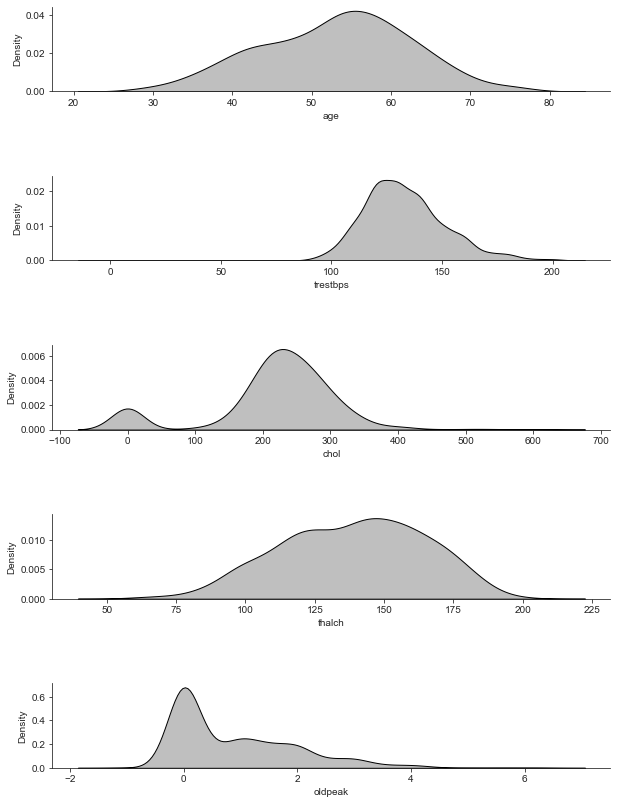

In [38]:
# Density/distribution graphs

count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(rc=custom_params)
# Setting the chart size
plt.subplots(figsize=(10, 14))

# Loop to make graphs
for col in df_2.loc[:, nu]:
    plt.subplot(len(nu),1, count)
    plt.subplots_adjust(hspace = 1)
    sns.kdeplot(df_2[col],
                shade=True,
                color='k')
    count+=1

In [39]:
# Test of normality

"""
The Shapiro-Wilk test is a test of normality.
It is used to determine whether or not a sample comes from a normal distribution.

H0: the distribution of the data --are not-- significantly different from normal distribution.
H1: the distribution of the data --are------ significantly different from normal distribution.

Source: https://www.statology.org/shapiro-wilk-test-python/
"""
df_2.loc[:, nu].apply(shapiro)

,age,trestbps,chol,thalch,oldpeak
0,0.992351,9.477654e-01,8.696086e-01,0.988670,8.159277e-01
1,0.000511,6.647650e-16,7.036940e-25,0.000011,8.018480e-29


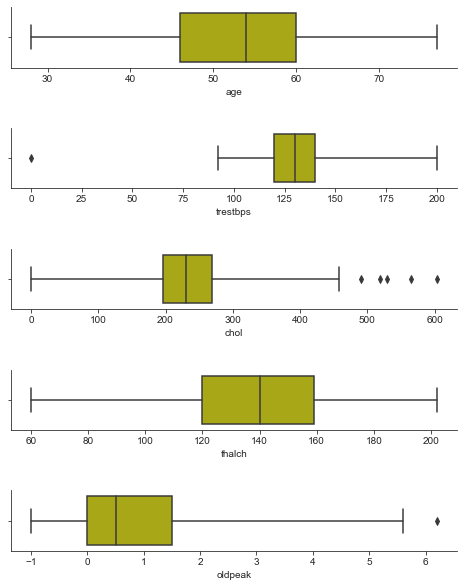

In [40]:
# Outliers

"""
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
In a sense, this definition leaves it up to the analyst to decide what will be considered abnormal.
Before abnormal observations can be singled out, it is necessary to characterize normal observations.

Source: https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
"""
count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.subplots(figsize=(8, 10))

# Loop to make graphs
for col in df_2.loc[:, nu]:
    plt.subplot(len(nu),1, count)
    plt.subplots_adjust(hspace = 1)
    sns.boxplot(df_2[col],
                orient="h",
                color='y',
                whis=3) # I chose "lower outer fence" to identify extreme outlier observations.
    count+=1

In [41]:
Q1 = df_2.loc[:, nu].quantile(0.25)
Q3 = df_2.loc[:, nu].quantile(0.75)
IQR = Q3 - Q1

((df_2.loc[:, nu] < (Q1 - 3 * IQR)) | (df_2.loc[:, nu] > (Q3 + 3 * IQR))).sum()

age         0
trestbps    1
chol        5
thalch      0
oldpeak     1
dtype: int64

In [42]:
df_new = df_2.loc[:, nu][~((df_2.loc[:, nu] < (Q1 - 3 * IQR)) | (df_2.loc[:, nu] > (Q3 + 3 * IQR))).any(axis=1)]

In [43]:
# Dataset without extreme outliers

df_2 = df_2[df_2.index.isin(df_new.index)]

Text(0.5, 1.0, 'Correlogram')

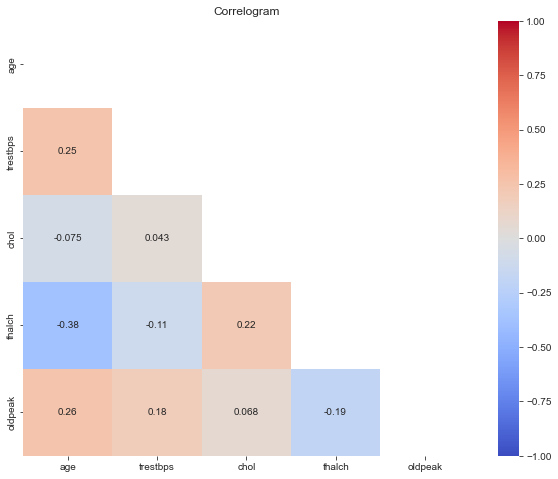

In [44]:
# Pearson’s correlation

"""
Correlation between sets of data is a measure of how well they are related.
The most common measure of correlation in stats is the Pearson Correlation.
It shows the linear relationship between two sets of data.
It is not able to tell the difference between dependent variables and independent variables.

Source: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/
"""
plt.rcParams['figure.figsize'] = [10, 8]  # for size

sns.heatmap(df_2.loc[:,nu].corr(),
            annot=True,
            cmap='coolwarm',
            vmax=1, vmin=-1, # cause corr can be in range from 1 to -1
            mask=np.triu(df_2.loc[:,nu].corr())).set_title("Correlogram")

The dataset does not have a strong correlation between the quantitative variables.

In [45]:
# saving the database

# df_2.to_csv("df_2.csv")